# World CO2 Emissions Forecasting
<br>

[*Cristian Castro Álvarez*](https://github.com/cristian-castro-a)

**Goal**: Forecast the amount of World CO2 emissions (in tonnes)

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot
import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

## Data
- The data comes from [Our World in Data](https://github.com/owid/co2-data)

**Comments:**
- Column 'CO2' of the dataframe indicates the Tonnes of CO2 emmitted into the atmosphere.

In [2]:
df = pd.read_csv('owid-co2-data.csv')
df.head()

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


In [3]:
df = df.groupby(by=['year']).sum().reset_index()[['year','co2']]
df.insert(loc = 1, column = 'month', value = 12)
df.insert(loc = 2, column = 'day', value = 31)
values = pd.to_datetime(df[['year','month','day']])
df.insert(loc = 0, column = 'date', value = values)
df.drop(['year','month','day'], axis = 1, inplace = True)
df.set_index('date', inplace = True)
df.head()

,co2
date,
1750-12-31,46.755
1751-12-31,46.755
1752-12-31,46.770
1753-12-31,46.770
1754-12-31,46.790


In [4]:
df.shape

(271, 1)

In [5]:
df.isna().sum()

co2    0
dtype: int64

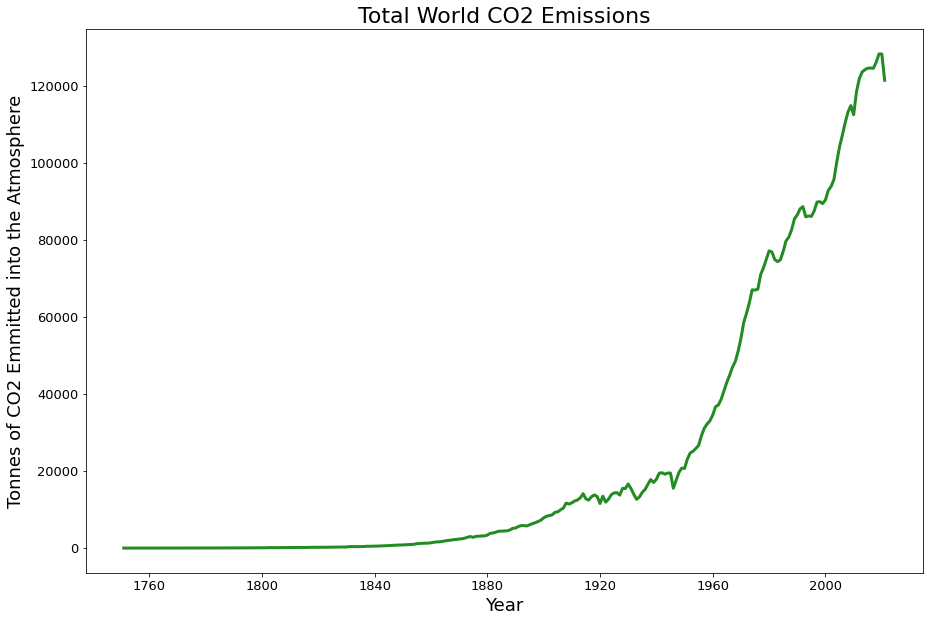

In [6]:
# Plotting trend
plt.figure(figsize = (15,10))
plt.plot(df,
         linewidth = 3,
         color = 'forestgreen')
plt.title('Total World CO2 Emissions', fontsize = 22)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Tonnes of CO2 Emmitted into the Atmosphere', fontsize = 18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()

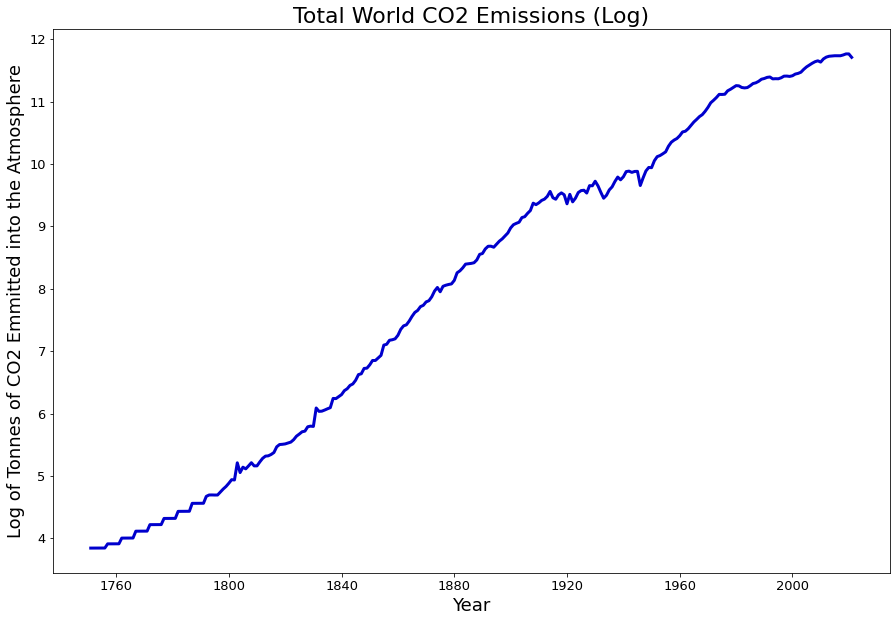

In [7]:
# Plotting trend in Log transform
plt.figure(figsize = (15,10))
plt.plot(np.log(df['co2']),
         linewidth = 3,
         color = 'mediumblue')
plt.title('Total World CO2 Emissions (Log)', fontsize = 22)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Log of Tonnes of CO2 Emmitted into the Atmosphere', fontsize = 18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()

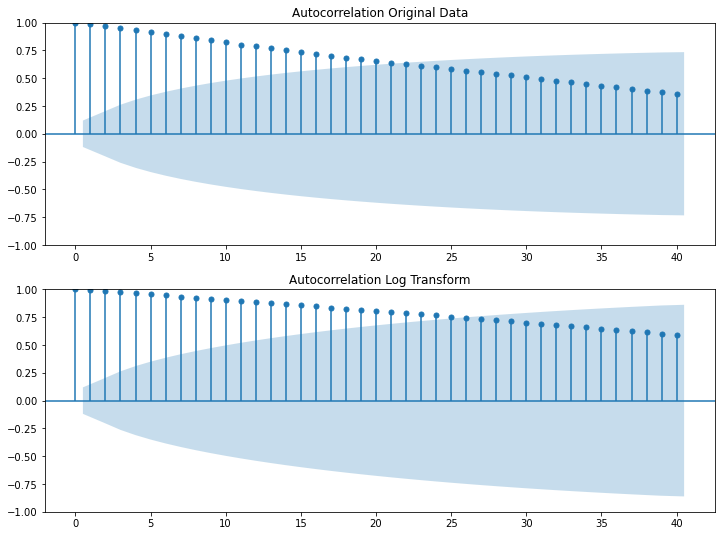

In [8]:
# Autocorrelation check
fig = plt.figure(figsize = (12,9))
ax1 = fig.add_subplot(211)
fig = plot_acf(x = df, 
               lags=40, 
               ax=ax1)
ax1.title.set_text('Autocorrelation Original Data')
ax2 = fig.add_subplot(212)
fig = plot_acf(x = np.log(df), 
               lags=40, 
               ax=ax2)
ax2.title.set_text('Autocorrelation Log Transform')

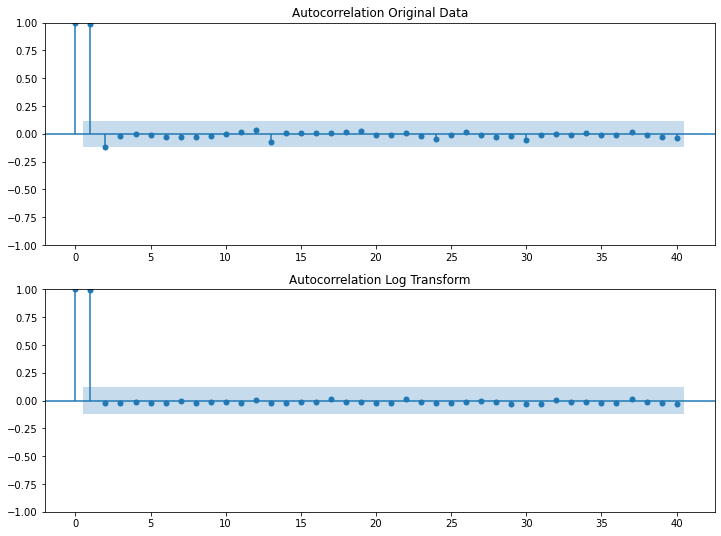

In [9]:
# Partial Autocorrelation check
fig = plt.figure(figsize = (12,9))
ax1 = fig.add_subplot(211)
fig = plot_pacf(x = df, 
               lags=40, 
               ax=ax1)
ax1.title.set_text('Autocorrelation Original Data')
ax2 = fig.add_subplot(212)
fig = plot_pacf(x = np.log(df), 
               lags=40, 
               ax=ax2)
ax2.title.set_text('Autocorrelation Log Transform')

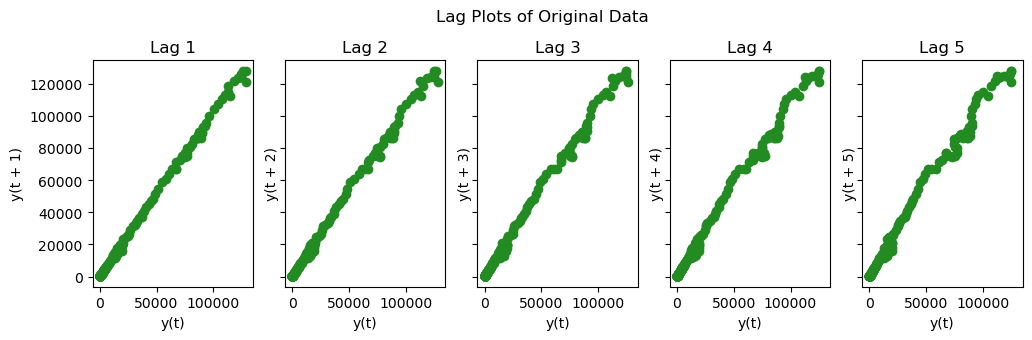

In [10]:
fig, axes = plt.subplots(1, 5, figsize=(12,3), sharex = True, sharey = True, dpi=100)
for i, ax in enumerate(axes.flatten()[:5]):
    lag_plot(df['co2'], lag=i+1, ax=ax, c = 'forestgreen')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Original Data', y=1.05)    
plt.show()

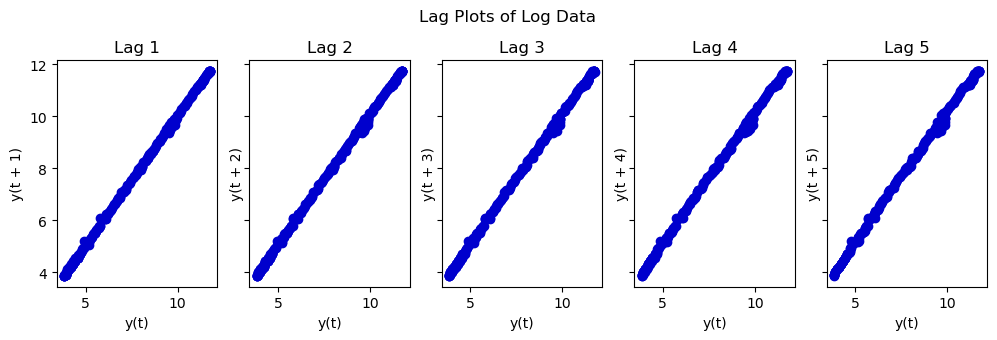

In [11]:
fig, axes = plt.subplots(1, 5, figsize=(12,3), sharex = True, sharey = True, dpi=100)
for i, ax in enumerate(axes.flatten()[:5]):
    lag_plot(np.log(df['co2']), lag=i+1, ax=ax, c = 'mediumblue')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Log Data', y=1.05)    
plt.show()

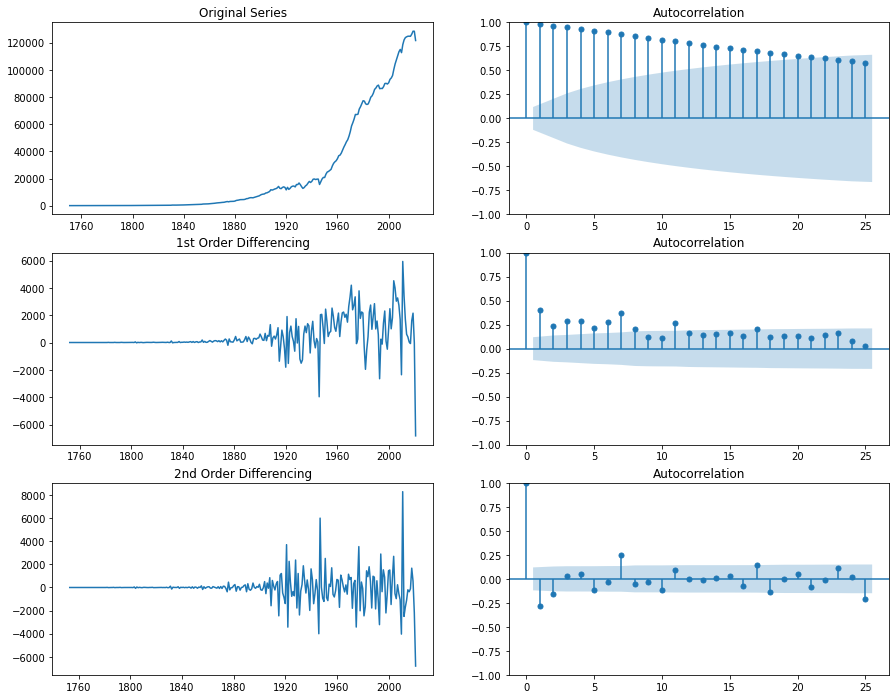

In [12]:
# Check differentiating in original data

fig, axes = plt.subplots(3, 2, figsize = (15,12))

# Original Series
axes[0, 0].plot(df['co2']); axes[0, 0].set_title('Original Series')
plot_acf(df['co2'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['co2'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['co2'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['co2'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['co2'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

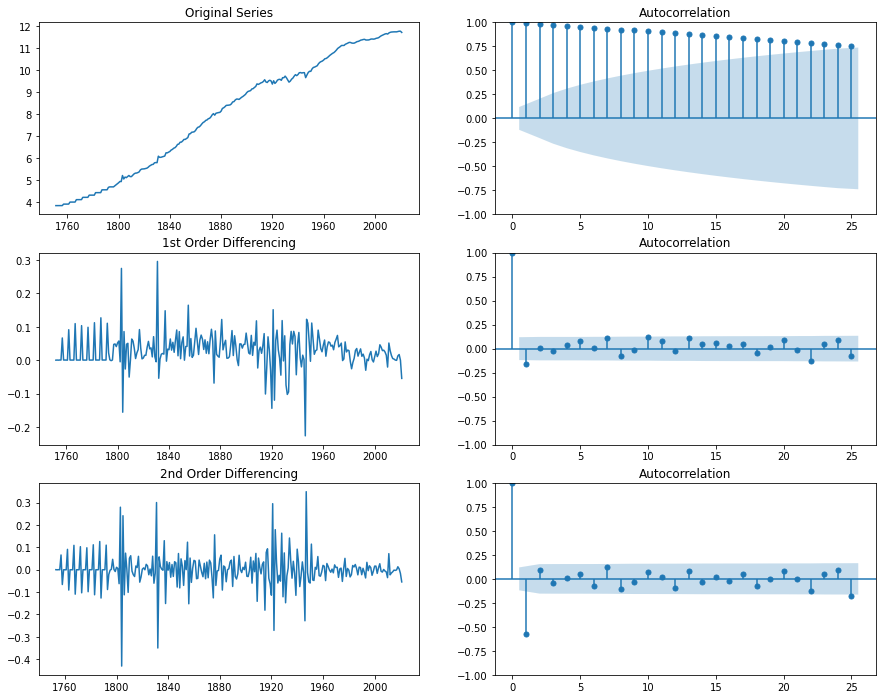

In [13]:
# Check differentiating in log data

fig, axes = plt.subplots(3, 2, figsize = (15,12))

# Original Series
axes[0, 0].plot(np.log(df['co2'])); axes[0, 0].set_title('Original Series')
plot_acf(np.log(df['co2']), ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.log(df['co2']).diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.log(df['co2']).diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(np.log(df['co2']).diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.log(df['co2']).diff().diff().dropna(), ax=axes[2, 1])

plt.show()

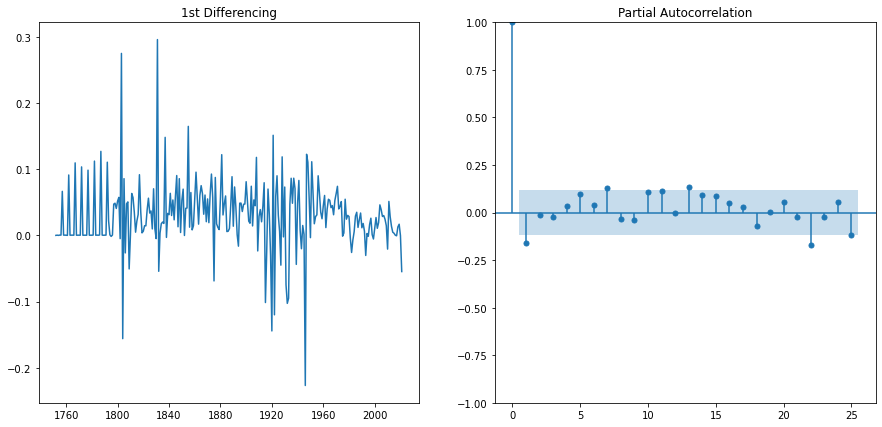

In [14]:
# Partial autocorrelation for Log Data

fig, axes = plt.subplots(1, 2, figsize = (15,7))
axes[0].plot(np.log(df['co2']).diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(np.log(df['co2']).diff().dropna(), ax=axes[1])

plt.show()

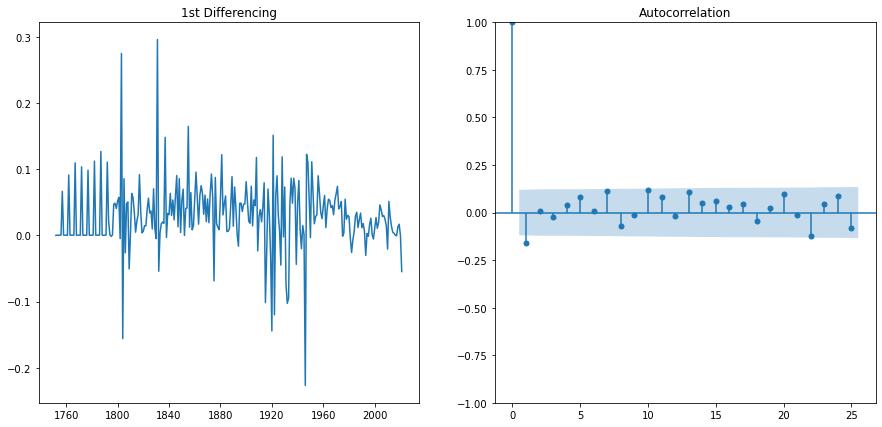

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].plot(np.log(df['co2']).diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(np.log(df['co2']).diff().dropna(), ax=axes[1])

plt.show()

## Arima Model

In [16]:
df['logco2'] = np.log(df['co2'])
df.head()

,co2,logco2
date,,
1750-12-31,46.755,3.844921
1751-12-31,46.755,3.844921
1752-12-31,46.770,3.845242
1753-12-31,46.770,3.845242
1754-12-31,46.790,3.845670


In [17]:
# ARIMA Model
model = sm.tsa.arima.ARIMA(endog = df['logco2'], 
                           order = (1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 logco2   No. Observations:                  271
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 415.919
Date:                Sun, 17 Apr 2022   AIC                           -825.838
Time:                        15:00:46   BIC                           -815.043
Sample:                    12-31-1750   HQIC                          -821.503
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9976      0.004    280.544      0.000       0.991       1.005
ma.L1         -0.9668      0.016    -58.895      0.000      -0.999      -0.935
sigma2         0.0027      0.000     23.735      0.0

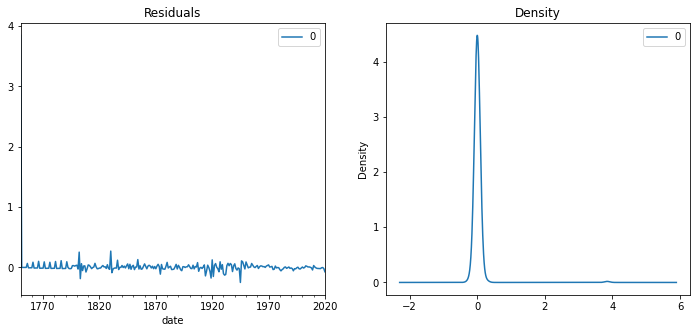

In [18]:
# Plot Residual Errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1, 2, figsize = (12,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [189]:
# Predictions
prediction = model_fit.predict()
predict = model_fit.get_prediction()
predict_ci = predict.conf_int()
predict_ci.describe().T

1750-12-31     0.000000
1751-12-31     3.844921
1752-12-31     3.844921
1753-12-31     3.845293
1754-12-31     3.845286
                ...    
2016-12-31    11.753181
2017-12-31    11.751936
2018-12-31    11.764465
2019-12-31    11.781248
2020-12-31    11.780415
Freq: A-DEC, Name: predicted_mean, Length: 271, dtype: float64

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
co2,271.0,23671.681325,36337.315419,46.755000,246.183500,4476.890000,25566.658500,128452.538000
logco2,271.0,8.006879,2.600054,3.844921,5.506075,8.406684,10.148943,11.763315


In [21]:
forecast_int = model_fit.get_forecast(steps = 20, alpha=0.05)
forecast_val = model_fit.forecast(steps = 20, alpha=0.05)
forecast_int_val = forecast_int.conf_int()
forecast_int_val.head()

,lower logco2,upper logco2
2021-12-31,11.622147,11.824869
2022-12-31,11.592981,11.884114
2023-12-31,11.572540,11.934559
2024-12-31,11.556346,11.980686
2025-12-31,11.542692,12.024200


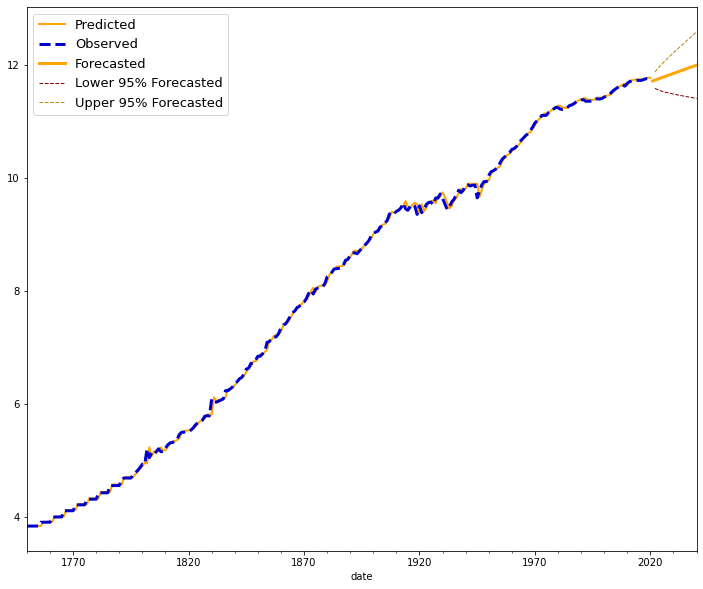

In [193]:
# Actual vs Predicted
fig, ax = plt.subplots(figsize = (12,10))
prediction[1:].plot(linewidth = 2,
               color = 'orange',
               ax = ax,
               label = 'Predicted')
df['logco2'].plot(linewidth = 3, 
                  color = 'mediumblue', 
                  ax = ax, 
                  label = 'Observed',
                  style = '--')
forecast_val.plot(linewidth = 3,
                  color = 'orange', 
                  ax = ax,
                  label = 'Forecasted')
forecast_int_val['lower logco2'].iloc[1:].plot(linewidth = 1, 
                                               color = 'darkred', 
                                               ax = ax, 
                                               label = 'Lower 95% Forecasted',
                                               style = '--')
forecast_int_val['upper logco2'].iloc[1:].plot(linewidth = 1, 
                                               color = 'darkgoldenrod', 
                                               ax = ax, 
                                               label = 'Upper 95% Forecasted',
                                               style = '--')
plt.legend(fontsize = 13)
plt.show()

## Cross Validation

In [184]:
def compute_mape(df):
    errors = []
    for ii in range(70,len(df)):
        X_train = df.index[:ii]
        X_val = df.index[ii]
        y_train = df['logco2'].iloc[:ii]
        y_val = df['logco2'].iloc[ii]
        model = sm.tsa.arima.ARIMA(endog = y_train, order = (1,1,1))
        model_fit = model.fit()
        forecast_val = model_fit.forecast(steps = 1, alpha=0.05)
        errors.append([X_val,100*mean_absolute_error([y_val], [forecast_val[0]])])
    return errors

In [185]:
errors = compute_mape(df)

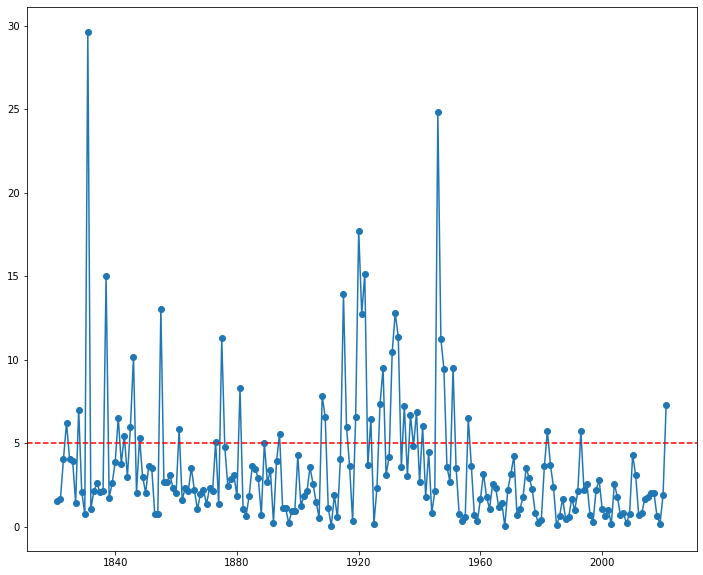

In [194]:
# Plotting the errors
x, y = zip(*errors)
plt.figure(figsize = (12,10))
plt.plot(x, y , 'o-')
plt.axhline(y=5.0, color='r', linestyle='--')
plt.show()